In [ ]:
# Problem 1.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1-1. Define a dataset
class Regression_Dataset(Dataset):
    def __init__(self, x_list, y_list):
        self.x_list = x_list
        self.y_list = y_list

    def __len__(self):
        return len(self.x_list)

    def __getitem__(self, idx):
        sample = dict()
        ###############################
        ######## Implement Here #######
        ###############################
        sample["x"] = self.x_list[idx]
        sample["y"] = self.y_list[idx]

        return sample

In [ ]:
# 1-2. Define a Model
class Regression_Model(nn.Module):
    def __init__(self, num_hidden_layers, n_dim):
        super().__init__()
        self.linear1 = nn.Linear(1, n_dim)
        self.linear2 = nn.Linear(n_dim, n_dim)
        self.linear3 = nn.Linear(n_dim, 1)

        self.activation = nn.ReLU()

        self.num_h = num_hidden_layers
        ###############################
        ######## Implement Here #######
        ###############################
        pass

    def forward(self, x):
        # Hint: x is given in dimension of (batch_size, 1)
        # please see what tensor.unsqueeze(?) do in pytorch Docs.
        ##############################
        ######## Implement Here #######
        ##############################

        x = self.linear1(x)
        x = self.activation(x)

        for i in range(self.num_h):
            x = self.linear2(x)
            x = self.activation(x)

        x = self.linear3(x)

        return x

In [ ]:
# 1-3. Prepare Training Dataset and Dataloader
# Do not change here
num_data = 10000
x_train = np.arange(num_data)/(num_data)*np.pi   # 10000 numbers from 0 to pi
y_train = np.sin(x_train)
train_data = Regression_Dataset(x_train, y_train)
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

In [ ]:
# 1-4-1. Set the Hyperparameters: lr, loss_fn, optimizer, num_epoch
# Do not change here EXCEPT for lr and num_epoch. You can freely change it.
model = Regression_Model(num_hidden_layers=2, n_dim=64)
lr = 2e-5
loss_fn = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
num_epoch = 50
#model.cuda() # Upload to cuda

In [ ]:
# 1-4-2. Train the model
for i in range(1, num_epoch + 1):
    # Forward propagation and obtain loss
    loss_list = []
    for i_batch, batch in enumerate(train_data_loader):
        x_batch = batch['x'].float()
        y_batch = batch['y'].float()
        x_batch = x_batch.unsqueeze(1) # search about unsqueeze
        y_batch = y_batch.unsqueeze(1) # search about unsqueeze
        #x_batch = x_batch.cuda()
        #y_batch = y_batch.cuda()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backpropagation and update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data.cpu().numpy())

    avg_loss = np.sum(np.array(loss_list))/len(train_data_loader.dataset)
    print(f'{i}-th epoch,')
    print(f'  Training loss: {avg_loss:.3f}')

1-th epoch,
  Training loss: 0.377
2-th epoch,
  Training loss: 0.242
3-th epoch,
  Training loss: 0.162
4-th epoch,
  Training loss: 0.126
5-th epoch,
  Training loss: 0.105
6-th epoch,
  Training loss: 0.090
7-th epoch,
  Training loss: 0.075
8-th epoch,
  Training loss: 0.062
9-th epoch,
  Training loss: 0.050
10-th epoch,
  Training loss: 0.039
11-th epoch,
  Training loss: 0.030
12-th epoch,
  Training loss: 0.022
13-th epoch,
  Training loss: 0.017
14-th epoch,
  Training loss: 0.013
15-th epoch,
  Training loss: 0.010
16-th epoch,
  Training loss: 0.007
17-th epoch,
  Training loss: 0.006
18-th epoch,
  Training loss: 0.004
19-th epoch,
  Training loss: 0.003
20-th epoch,
  Training loss: 0.003
21-th epoch,
  Training loss: 0.002
22-th epoch,
  Training loss: 0.002
23-th epoch,
  Training loss: 0.001
24-th epoch,
  Training loss: 0.001
25-th epoch,
  Training loss: 0.001
26-th epoch,
  Training loss: 0.001
27-th epoch,
  Training loss: 0.001
28-th epoch,
  Training loss: 0.000
2

In [ ]:
# 1-5. Test the model
num_data = 10000
x_test = np.random.uniform(0, np.pi*2, num_data) # Choose 10000 random numbers between 0 and 2*pi
y_test = np.sin(x_test)
test_data = Regression_Dataset(x_test, y_test)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

x_axis = [] # to plot y = f(x)
y_axis = [] # to plot y = f(x)

test_loss_list = []
###############################
######## Implement Here #######
###############################
model.eval()

for i, data in enumerate(test_data_loader):
    x_data = data["x"].float()
    y_data = data["y"].float()
    x_data = x_data.unsqueeze(1)
    y_data = y_data.unsqueeze(1)
    y_pred = model(x_data)
    loss = loss_fn(y_data,y_pred)
    for i in x_data:
        x_axis.append(i.detach().numpy())
    for i in y_pred:
        y_axis.append(i.detach().numpy())
    test_loss_list.append(loss.data.cpu().numpy())

test_avg_loss = np.sum(np.array(test_loss_list))/len(test_data_loader.dataset)
print (f'Test_loss: {test_avg_loss:.5f}')

Test_loss: 0.11720


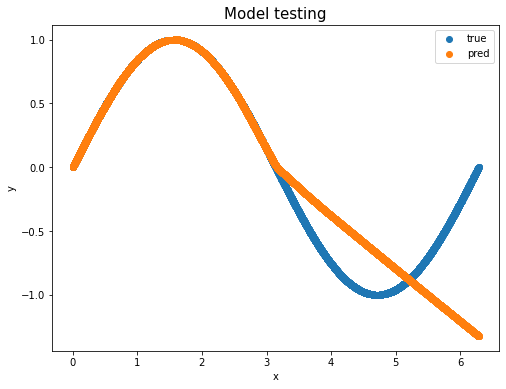

In [ ]:
# 1-6. Plot the result
fig = plt.figure(figsize=(8,6))
###############################
######## Implement Here #######
###############################
plt.scatter(x_test, y_test, label = "true")
plt.scatter(x_axis, y_axis, label = "pred")


plt.title("Model testing", size=15)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
#Install miniconda
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local

# Install RDKit
!time conda install -q -y -c conda-forge rdkit==2020.09.2
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-12 05:36:19--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-10-12 05:36:19--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M  41.6MB/s    in 2.0s    

2022-10-12 05:36:21 (41.6 MB/s) - ‘Minico

In [ ]:
import rdkit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/MyDrive/CH453_Assignment1')

Mounted at /content/drive


In [ ]:
# Problem 2.
import torch
from torch.utils.data import Dataset
from rdkit import Chem
from rdkit.Chem.Descriptors import TPSA
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np

class MyDataset(Dataset):
    def __init__(self, smis, nBits, radius=2):
        ###############################
        ######## Implement Here #######
        ###############################
        self.smis = smis
        self.nBits = nBits
        self.radius = radius
        fp_list = []
        tpsa_list = []
        for smi in self.smis:
            mol = Chem.MolFromSmiles(smi)
            fp_list.append(GetMorganFingerprintAsBitVect(mol, radius=self.radius, nBits=self.nBits))
            tpsa_list.append(TPSA(mol))
        self.fp_list = torch.from_numpy(np.array(fp_list))
        self.tpsa_list = torch.from_numpy(np.array(tpsa_list))
        pass

    def __len__(self):
        return len(self.smis)

    def __getitem__(self,idx):
        sample = dict()
        ###############################
        ######## Implement Here #######
        ###############################
        sample["fp"] = self.fp_list[idx]
        sample["tpsa"] = self.tpsa_list[idx]
        return sample

import torch.nn as nn
class LinearRegressor(nn.Module):
    def __init__(self, num_hidden_layers, in_dim, hidden_dim, out_dim, dropout):
        super().__init__()
        ###############################
        ######## Implement Here #######
        ###############################
        self.num_h = num_hidden_layers

        self.linear1 = nn.Linear(in_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, out_dim)

        self.activation = nn.ReLU()

        self.dp = nn.Dropout(p=dropout)
        pass

    def forward(self, x):
        ###############################
        ######## Implement Here #######
        ###############################
        x = self.linear1(x)
        x = self.activation(x)
        x = self.dp(x)

        for i in range(self.num_h):
            x = self.linear2(x)
            x = self.activation(x)
            x = self.dp(x)

        x = self.linear3(x)

        return x

def load_data(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    smiles_list = [line.strip() for line in lines]
    return smiles_list

In [ ]:
# 2-1. Load data
nBits = 1024
train_file_name = 'train_smiles.txt'  # You should change the path correctly.
test_file_name = 'test_smiles.txt'  # You should change the path correctly.
train_smi_list = load_data(train_file_name)
test_smi_list = load_data(test_file_name)
###############################
######## Implement Here #######
###############################
train_data = MyDataset(train_smi_list, nBits) # You should change the code properly.
test_data = MyDataset(test_smi_list, nBits)

# prepare data loader
from torch.utils.data import DataLoader
data_loaders = {}
data_loaders['train'] = DataLoader(train_data, batch_size=128, shuffle=True)
data_loaders['test'] = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
# 2-2. Train model
# Setting learning parameters
num_epoch = 100 # Don't change
lr = 1e-4 # Don't change
num_hidden_layers = 3 # Don't change
dropout = 0.2
in_dim = nBits
hidden_dim = 256 # Don't change
out_dim = 1 # Don't change

# prepare model
model = LinearRegressor(
        num_hidden_layers=num_hidden_layers,
        in_dim=in_dim,
        hidden_dim=hidden_dim,
        out_dim=out_dim,
        dropout=dropout
)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# Model training
import time, copy
loss_fn = nn.MSELoss(reduction='mean')
#model.cuda()
train_loss_history = []
test_loss_history = []
best_test_loss = 1e9
train_start = time.time()
for i in range(1, num_epoch + 1):
    since = time.time()
    # 2-2-1. Training phase
    model.train()
    train_loss_list = []
    for batch_idx, batch in enumerate(data_loaders['train']):
        x_batch = batch['fp'].float()
        y_batch = batch['tpsa'].float()
        #x_batch = x_batch.cuda()
        #y_batch = y_batch.cuda()
        y_pred = model(x_batch)
        y_pred = y_pred.squeeze(1)
        loss = loss_fn(y_pred, y_batch)
        train_loss_list.append(copy.deepcopy(loss.data.cpu().numpy()))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_train_avg_loss = \
        np.sum(np.array(train_loss_list))/len(data_loaders['train'].dataset)
    train_loss_history.append(epoch_train_avg_loss)

    # 2-2-2. Test phase
    model.eval()
    test_loss_list = []
    with torch.no_grad():
        for batch_idx, batch in enumerate(data_loaders['test']):
            x_batch = batch['fp'].float()
            y_batch = batch['tpsa'].float()
            #x_batch = x_batch.cuda()
            #y_batch = y_batch.cuda()
            y_pred = model(x_batch)
            y_pred = y_pred.squeeze(1)
            loss = loss_fn(y_pred, y_batch)
            test_loss_list.append(loss.data.cpu().numpy())

    epoch_test_avg_loss = \
        np.sum(np.array(test_loss_list))/len(data_loaders['test'].dataset)
    test_loss_history.append(epoch_test_avg_loss)
    if epoch_test_avg_loss < best_test_loss:
        best_epoch = i
        best_test_loss = epoch_test_avg_loss
        best_model_wts = copy.deepcopy(model.state_dict())

    # 2-2-3. print the result
    end = time.time()
    print(f'{i}-th epoch,')
    print(f'\ttraining loss: {epoch_train_avg_loss:.3f}')
    print(f'\ttest loss: {epoch_test_avg_loss:.3f}')
    print(f'\tepoch time: {end-since:.3f}')

1-th epoch,
	training loss: 50.937
	test loss: 44.181
	epoch time: 0.796
2-th epoch,
	training loss: 23.660
	test loss: 7.673
	epoch time: 0.789
3-th epoch,
	training loss: 4.463
	test loss: 6.604
	epoch time: 0.791
4-th epoch,
	training loss: 3.439
	test loss: 5.579
	epoch time: 0.788
5-th epoch,
	training loss: 2.695
	test loss: 4.814
	epoch time: 0.749
6-th epoch,
	training loss: 2.264
	test loss: 4.236
	epoch time: 0.804
7-th epoch,
	training loss: 1.963
	test loss: 3.805
	epoch time: 0.773
8-th epoch,
	training loss: 1.720
	test loss: 3.511
	epoch time: 0.764
9-th epoch,
	training loss: 1.624
	test loss: 3.260
	epoch time: 0.752
10-th epoch,
	training loss: 1.480
	test loss: 3.111
	epoch time: 1.187
11-th epoch,
	training loss: 1.424
	test loss: 2.956
	epoch time: 1.161
12-th epoch,
	training loss: 1.386
	test loss: 2.848
	epoch time: 1.167
13-th epoch,
	training loss: 1.307
	test loss: 2.775
	epoch time: 1.173
14-th epoch,
	training loss: 1.248
	test loss: 2.698
	epoch time: 1.20

----------
Train Finished.
Training time: 97.48s
The best epoch: 97
The best test loss: 2.209


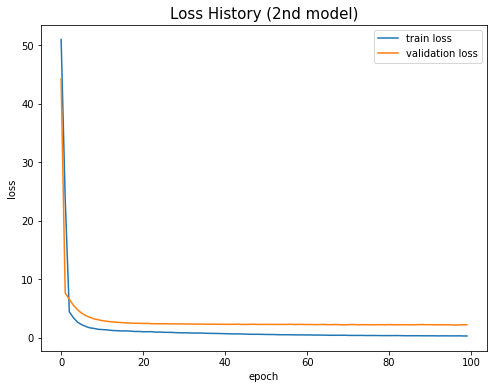

In [ ]:
import os

save_dir = 'assignment_1_1_models'
if os.path.isdir(save_dir): pass
else: os.mkdir(save_dir)
torch.save(best_model_wts, f'{save_dir}/Best_model_{nBits}_{str(best_epoch)}_1.pt')
print('-'*10)
print('Train Finished.')
print(f'Training time: {time.time()-train_start:.2f}s')
print(f'The best epoch: {best_epoch}')
print(f'The best test loss: {best_test_loss:.3f}')


# 2-4. Plot the loss histories
import matplotlib.pyplot as plt
###############################
######## Implement Here #######
###############################
fig = plt.figure(figsize = (8, 6))

plt.plot(np.arange(num_epoch), train_loss_history, label = 'train loss')
plt.plot(np.arange(num_epoch), test_loss_history, label = 'validation loss')
plt.title("Loss History (2nd model)", size = 15)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

----------
Train Finished.
Training time: 281.56s
The best epoch: 98
The best test loss: 2.249


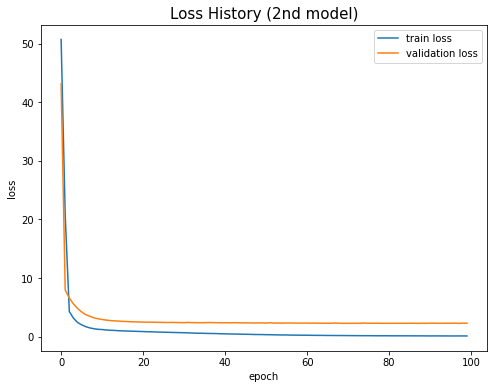

In [ ]:
import os

save_dir = 'assignment_1_models'
if os.path.isdir(save_dir): pass
else: os.mkdir(save_dir)
torch.save(best_model_wts, f'{save_dir}/Best_model_{nBits}_{str(best_epoch)}_dropout.pt')
print('-'*10)
print('Train Finished.')
print(f'Training time: {time.time()-train_start:.2f}s')
print(f'The best epoch: {best_epoch}')
print(f'The best test loss: {best_test_loss:.3f}')


# 2-4. Plot the loss histories
import matplotlib.pyplot as plt
###############################
######## Implement Here #######
###############################
fig = plt.figure(figsize = (8, 6))

plt.plot(np.arange(num_epoch), train_loss_history, label = 'train loss')
plt.plot(np.arange(num_epoch), test_loss_history, label = 'validation loss')
plt.title("Loss History (2nd model)", size = 15)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

----------
Train Finished.
Training time: 244.05s
The best epoch: 25
The best test loss: 2.214


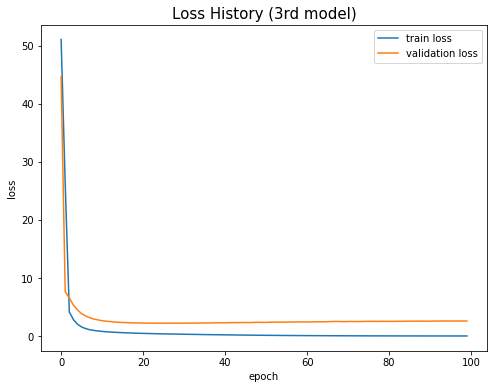

In [ ]:
import os

save_dir = 'assignment_1_models'
if os.path.isdir(save_dir): pass
else: os.mkdir(save_dir)
torch.save(best_model_wts, f'{save_dir}/Best_model_{nBits}_{str(best_epoch)}.pt')
print('-'*10)
print('Train Finished.')
print(f'Training time: {time.time()-train_start:.2f}s')
print(f'The best epoch: {best_epoch}')
print(f'The best test loss: {best_test_loss:.3f}')


# 2-4. Plot the loss histories
import matplotlib.pyplot as plt
###############################
######## Implement Here #######
###############################
fig = plt.figure(figsize = (8, 6))

plt.plot(np.arange(num_epoch), train_loss_history, label = 'train loss')
plt.plot(np.arange(num_epoch), test_loss_history, label = 'validation loss')
plt.title("Loss History (3rd model)", size = 15)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

----------
Train Finished.
Training time: 204.30s
The best epoch: 28
The best test loss: 2.203


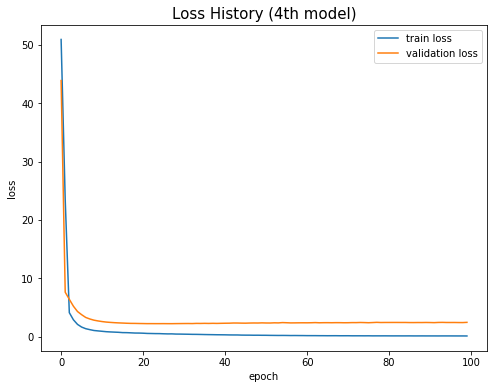

In [ ]:
import os

save_dir = 'assignment_1_models'
if os.path.isdir(save_dir): pass
else: os.mkdir(save_dir)
torch.save(best_model_wts, f'{save_dir}/Best_model_{nBits}_{str(best_epoch)}_dropout.pt')
print('-'*10)
print('Train Finished.')
print(f'Training time: {time.time()-train_start:.2f}s')
print(f'The best epoch: {best_epoch}')
print(f'The best test loss: {best_test_loss:.3f}')


# 2-4. Plot the loss histories
import matplotlib.pyplot as plt
###############################
######## Implement Here #######
###############################
fig = plt.figure(figsize = (8, 6))

plt.plot(np.arange(num_epoch), train_loss_history, label = 'train loss')
plt.plot(np.arange(num_epoch), test_loss_history, label = 'validation loss')
plt.title("Loss History (4th model)", size = 15)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()